In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns', None)

In [159]:
train = pd.read_csv("train.csv")

In [160]:
test = pd.read_csv("test.csv")

In [161]:
train.shape

(1460, 81)

In [162]:
test.shape

(1459, 80)

In [163]:
# combining the train and test for imputing missing values
data = pd.concat([train, test], axis = 0, sort = False)
backup = data.copy()

In [164]:
data.shape

(2919, 81)

In [165]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [166]:
# checking the % missing values in each of the features 
(data.isnull().sum()/len(data)*100).sort_values(ascending = False)

PoolQC           99.657417
MiscFeature      96.402878
Alley            93.216855
Fence            80.438506
SalePrice        49.982871
                   ...    
CentralAir        0.000000
SaleCondition     0.000000
Heating           0.000000
Foundation        0.000000
Id                0.000000
Length: 81, dtype: float64

<AxesSubplot:>

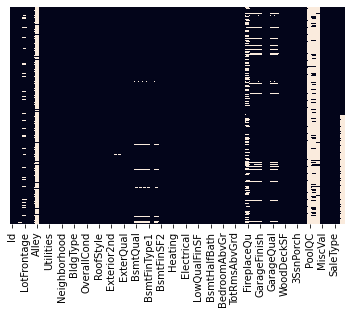

In [167]:
# visualizing t=missing values with the help of heatmap
sns.heatmap(data.isnull(), yticklabels=False, cbar= False)

In [168]:
# features having more than 50% of null values 
features_50_null = [i for i in data if data[i].isnull().sum()*100/len(data) > 50];features_50_null

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [169]:
# dropping the features that have more than 50% of the missing values
data.drop(features_50_null, axis = 1, inplace = True)

In [170]:
data.shape
# we are left with 77 features now

(2919, 77)

In [171]:
# checking features with missing values between 10-50%
features_10_50_null = [i for i in data if 10 < data[i].isnull().sum()*100/len(data) <= 50];features_10_50_null

['LotFrontage', 'FireplaceQu', 'SalePrice']

In [172]:
# since there are not much of features that have 10-50% of missing values we will try to fill those missing values
# note: the missing values of Sale price is due to concatination of train and test dataset

In [173]:
# finding out the categorical features with missing values
cat_features = [i for i in data if data[i].dtype == "O" and data[i].isnull().sum() > 0]
print(cat_features)
print(len(cat_features))

['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType']
19


In [174]:
# create a function for filling the missing values of categorical features
# here will will fill the missing values of categorical features with the value that occur most frequently
def replace_cat_features(data, cols):
    temp_data = data.copy()
    for i in cols:
        temp_data[cat_features] = temp_data[cat_features].fillna(data[i].mode()[0])
    return temp_data
data = replace_cat_features(data, cols = cat_features)
data[cat_features].isnull().sum()

MSZoning        0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
SaleType        0
dtype: int64

In [175]:
# finding out numerical features
num_features = [i for i in data if data[i].dtype != "O"]
print(num_features)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [176]:
# since the year features are in year we will convert them in age because it can affect our predictions at later stage
# i.e we'll convert the year features as (yearSold - the year_feature)
year_feature = [i for i in num_features if 'Yr' in i or 'Year' in i];year_feature
for i in year_feature[0:3]:
    data[i] = data["YrSold"]-data[i]
data[year_feature[:3]]

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0
...,...,...,...
1454,36,36,NaN
1455,36,36,36.0
1456,46,10,46.0
1457,14,14,NaN


In [177]:
# drop the year sold columns as it will be of no use now
data.drop("YrSold", axis = 1, inplace = True)

In [178]:
# finding out the numerical features that have null values in it
null_num_features = [i for i in data if data[i].dtype != "O" and data[i].isnull().sum()> 0];print(null_num_features)

['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [179]:
# total no of missing values in numerical features
data[null_num_features].isnull().sum()

LotFrontage      486
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SalePrice       1459
dtype: int64

In [180]:
# replacing the numerical features missing values with the median value since the data might contain outliers
for i in null_num_features[:-1]:
    # since the data might contain outliers we will replace using median
    median_value = data[i].median()
    
    # creating new feature to capture nan values
    data[i].fillna(median_value, inplace = True)

data[null_num_features].isnull().sum()

LotFrontage        0
MasVnrArea         0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
BsmtFullBath       0
BsmtHalfBath       0
GarageYrBlt        0
GarageCars         0
GarageArea         0
SalePrice       1459
dtype: int64

In [181]:
data.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,RL,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,68.0,9765,Pave,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,8,16,16,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,Ex,Gd,PConc,Gd,Gd,No,ALQ,310.0,Unf,0.0,370.0,680.0,GasA,Gd,Y,SBrkr,680,790,0,1470,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,BuiltIn,16.0,Fin,2.0,420.0,TA,TA,Y,232,63,0,0,0,0,480,4,WD,Normal,185000.0
96,97,20,RL,78.0,10264,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,7,7,Gable,CompShg,VinylSd,VinylSd,BrkFace,183.0,Gd,TA,PConc,Gd,TA,Av,ALQ,1162.0,Unf,0.0,426.0,1588.0,GasA,Ex,Y,SBrkr,1588,0,0,1588,0.0,0.0,2,0,3,1,Gd,6,Typ,0,RL,Attchd,7.0,RFn,2.0,472.0,TA,TA,Y,158,29,0,0,0,0,0,8,WD,Normal,214000.0
97,98,20,RL,73.0,10921,Pave,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,42,42,Hip,CompShg,HdBoard,HdBoard,BrkFace,48.0,TA,TA,CBlock,TA,TA,No,Rec,520.0,Unf,0.0,440.0,960.0,GasA,TA,Y,FuseF,960,0,0,960,1.0,0.0,1,0,3,1,TA,6,Typ,0,RL,Attchd,42.0,Fin,1.0,432.0,TA,TA,P,120,0,0,0,0,0,0,5,WD,Normal,94750.0
98,99,30,RL,85.0,10625,Pave,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,90,60,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,ALQ,108.0,Unf,0.0,350.0,458.0,GasA,Fa,N,SBrkr,835,0,0,835,0.0,0.0,1,0,2,1,TA,5,Typ,0,RL,Basment,90.0,Unf,1.0,366.0,Fa,TA,Y,0,0,77,0,0,0,400,5,COD,Abnorml,83000.0


In [182]:
# lets check whether all the missing values are treated or not
[i for i in data if 10 < data[i].isnull().sum()*100/len(data) > 0]

['SalePrice']

In [183]:
# since only sale price has missing values and all the missing values are filled we will move further with our analysis

In [184]:
# extracting all the categorical features 
all_cat_features = [i for i in data if data[i].dtype == "O"];
len(all_cat_features)

39

In [185]:
# defining a function that creates dummy variables for each category present inside our features
def dummy_creator(cols):
    data_final = data
    i = 0
    for features in cols:
        print(cols)
        df1 = pd.get_dummies(data[cols], drop_first=True)
        
        data.drop(cols, axis = 1, inplace = True)
        if i == 0:
            data_final = df1.copy()
        else:
            data_final = pd.concat([data_final, df1], axis =1)
            i = i+1
        data_final = pd.concat([data, data_final], axis = 1)
        return data_final

In [186]:
# converting data into required form
data = dummy_creator(all_cat_features)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [187]:
# lets check the shape of the data now
data.shape

(2919, 255)

In [188]:
# since the dummy variables are now created the number of columns has increased significantly

In [189]:
# dropping duplicated columnsdata = data.loc[:,~data.columns.duplicated()]

In [190]:
# since no feature was duplicated hence no columns were dropped
data.shape

(2919, 255)

In [191]:
# seperating the train and test datasets for further analysis
train_data = data.iloc[:1460,:]

In [192]:
train_data.shape

(1460, 255)

In [193]:
test_data = data.iloc[1460:,:]


In [194]:
test_data.shape

(1459, 255)

In [195]:
# dropping the saleprice column as it is to be predicted
test_data.drop(["SalePrice","Id"], axis = 1, inplace = True)

In [196]:
# splitting the train-test and target variables
X_train = train_data.drop(["SalePrice", "Id"], axis = 1)
y_train= train_data["SalePrice"]
X_test = test_data

In [197]:
# using xgboost for saleprice prediction
import xgboost as xgb
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [198]:
preds = regressor.predict(X_test)
preds

array([127204.26, 157800.81, 185612.64, ..., 158262.27, 114886.84,
       226638.08], dtype=float32)

In [199]:
## hyperparameter optimization of xgboost
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [100, 500, 700, 1000, 1200, 1500]
max_depth = list(range(1, 16, 2))
booster = ["gbtree", 'gblinear']
learning_rate = [0.05, 0.1, 0.15, 0.2, 0.25]
min_child_weight = [1,2,3,4,5,6]
base_score = [0.25, 0.5 ,0.75,1]

# defining the grid for hyperparameter search
parameter_grid = {"n_estimators": n_estimators,
                 "max_depth": max_depth,
                 "learning_rate": learning_rate,
                 "booster":booster,
                 "base_score": base_score,
                  "min_child_weight": min_child_weight}

In [200]:
# set up randomsearch cv with 5 - fold cross validation
random_cv = RandomizedSearchCV(estimator = regressor,  
                              param_distributions=parameter_grid, 
                              cv = 5, n_iter= 50 , 
                              scoring="neg_mean_absolute_error", n_jobs= 4,
                              verbose=5, return_train_score=True, 
                              random_state=10)

In [201]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   41.2s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  8.1min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 10.5min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=8,
                                          num_par...
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_sc

In [202]:
# getting the best estimator
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [203]:
# setting up the new regressor
regressor = xgb.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=np.nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [204]:
# fitting the data into new regressor
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [205]:
preds = regressor.predict(X_test)
preds

array([121238.36, 157306.5 , 171215.45, ..., 167672.8 , 126124.24,
       232276.28], dtype=float32)

In [206]:
# exporting prediction for submission
preds = pd.DataFrame(preds)
sub_temp = pd.read_csv("sample_submission.csv")
sub = pd.concat([sub_temp["Id"], preds], axis =1)
sub.columns = ["Id", "SalePrice"]
sub.to_csv("Submission.csv", index = False)

In [207]:
#KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# CV model
kfold = KFold(n_splits=5)
results = cross_val_score(regressor, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Accuracy: 88.68% (1.67%)


In [208]:
# the training set gives us ~89% accuracy 